In [33]:
# import packages for analysis and modeling
import pandas as pd  # data frame operations
from pandas.tools.plotting import scatter_matrix  # scatter plot matrix
import numpy as np  # arrays and math functions
from scipy.stats import uniform  # for training-and-test split
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
from sklearn.tree import DecisionTreeRegressor  # machine learning tree
from sklearn.ensemble import RandomForestRegressor # ensemble method
import matplotlib.pyplot as plt  # 2D plotting
%matplotlib inline
import patsy  # translate model specification into design matrices
import seaborn as sns  # PROVIDES TRELLIS AND SMALL MULTIPLE PLOTTING

In [34]:
# read in Coaches salary data and create data frame
coaches = pd.read_csv("CoachesFinal.csv")

# examine the structure of the data frame
print("\nContents of coaches data frame ---------------")

print(coaches.shape)  # check the structure of the data frame

# print the first five rows of the data frame
print(pd.DataFrame.head(coaches))
#coachesDF = pd.DataFrame(coaches)


Contents of coaches data frame ---------------
(124, 21)
            Name       School Conference    Salary  OtherPay  TotalSalary  \
0  Steve Addazio       Temple   Big East       NaN       NaN          NaN   
1      Robb Akey        Idaho        WAC  375797.0    6200.0     381997.0   
2  Gary Andersen   Utah State        WAC  415000.0       0.0     415000.0   
3     Chris Ault  Nevada-Reno   Mt. West  493093.0       0.0     493093.0   
4  David Bailiff         Rice       CUSA  608846.0       NaN     608846.0   

   MaxBonus  WinPerc WinPercHalf  GSR     ...                      Stadium  \
0       NaN    0.083         Bad   81     ...      Lincoln Financial Field   
1  158262.0    0.333         Bad   71     ...                  Kibbie Dome   
2  150000.0    0.083         Bad   86     ...               Romney Stadium   
3   30000.0    0.615        Good   71     ...               Mackay Stadium   
4       NaN    0.538        Good   90     ...                 Rice Stadium   

          

In [5]:
print(coaches.describe())

             Salary        OtherPay   TotalSalary      MaxBonus     WinPerc  \
count  1.160000e+02       74.000000  1.160000e+02  1.040000e+02  121.000000   
mean   1.581877e+06    25837.202703  1.598359e+06  5.230432e+05    0.489576   
std    1.155315e+06   118467.100047  1.165929e+06  4.277214e+05    0.240474   
min    2.500000e+05        0.000000  2.500000e+05  2.500000e+04    0.000000   
25%    5.487500e+05        0.000000  5.488250e+05  1.595655e+05    0.333000   
50%    1.333924e+06     1375.000000  1.405823e+06  4.146630e+05    0.500000   
75%    2.386626e+06     8300.000000  2.410954e+06  7.425000e+05    0.692000   
max    5.316667e+06  1000000.000000  5.476738e+06  2.050000e+06    1.000000   

              GSR         FGR       Capacity        Built     Expanded  \
count  124.000000  124.000000     123.000000   123.000000   100.000000   
mean    81.346774   65.508065   51684.170732  1957.390244  2003.180000   
std      9.295549   16.442804   23476.954154    28.704725     9.74

In [6]:
coaches.head()

Name       School Conference    Salary  OtherPay  TotalSalary  \
0  Steve Addazio       Temple   Big East       NaN       NaN          NaN   
1      Robb Akey        Idaho        WAC  375797.0    6200.0     381997.0   
2  Gary Andersen   Utah State        WAC  415000.0       0.0     415000.0   
3     Chris Ault  Nevada-Reno   Mt. West  493093.0       0.0     493093.0   
4  David Bailiff         Rice       CUSA  608846.0       NaN     608846.0   

   MaxBonus  WinPerc WinPercHalf  GSR     ...                      Stadium  \
0       NaN    0.083         Bad   81     ...      Lincoln Financial Field   
1  158262.0    0.333         Bad   71     ...                  Kibbie Dome   
2  150000.0    0.083         Bad   86     ...               Romney Stadium   
3   30000.0    0.615        Good   71     ...               Mackay Stadium   
4       NaN    0.538        Good   90     ...                 Rice Stadium   

           City State Capacity   Built  Expanded  ExpandedYes  Div   Latitude  \
0  Philadelphia    PA  68532.0  2003.0       NaN           No  fbs  39.900749   
1        Moscow    ID  16000.0  1975.0       NaN           No  fbs  46.726350   
2         Logan    UT  25513.0  1968.0    1980.0          Yes  fbs  41.751532   
3          Reno    NV  30000.0  1966.0    2016.0          Yes  fbs  39.546925   
4       Houston    TX  47000.0  1950.0       NaN           No  fbs  29.716234   

    Longitude  
0  -75.167491  
1 -117.017552  
2 -111.812106  
3 -119.817560  
4  -95.409265  

[5 rows x 21 columns]

In [7]:
coaches.dtypes

Name            object
School          object
Conference      object
Salary         float64
OtherPay       float64
TotalSalary    float64
MaxBonus       float64
WinPerc        float64
WinPercHalf     object
GSR              int64
FGR              int64
Stadium         object
City            object
State           object
Capacity       float64
Built          float64
Expanded       float64
ExpandedYes     object
Div             object
Latitude       float64
Longitude      float64
dtype: object

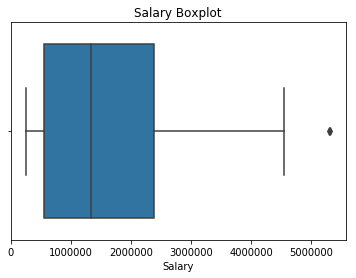

In [10]:
sns.boxplot(coaches['Salary'])
plt.title('Salary Boxplot')
plt.show()

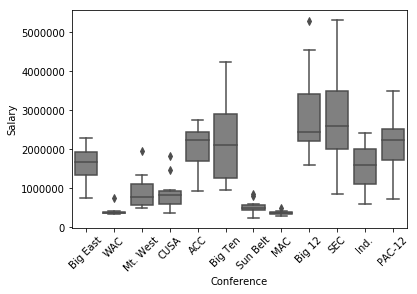

In [11]:
#boxplots of salary by conference
g = sns.boxplot(x="Conference", y="Salary", data=coaches, color = "gray")
plt.setp(g.get_xticklabels(), rotation=45)
plt.show()

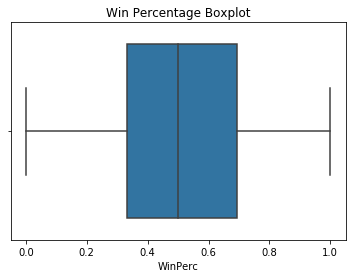

In [13]:
sns.boxplot(coaches['WinPerc'])
plt.title('Win Percentage Boxplot')
plt.show()

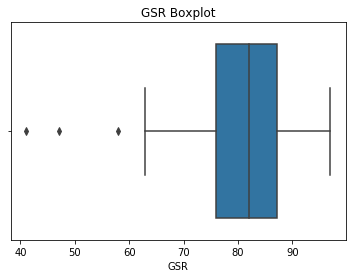

In [14]:
sns.boxplot(coaches['GSR'])
plt.title('GSR Boxplot')
plt.show()

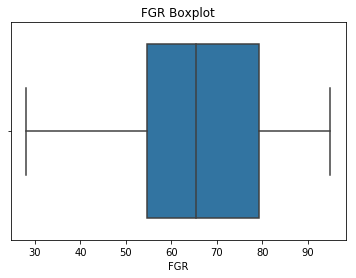

In [15]:
sns.boxplot(coaches['FGR'])
plt.title('FGR Boxplot')
plt.show()

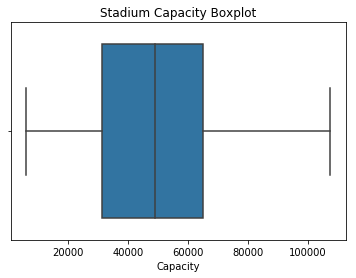

In [16]:
sns.boxplot(coaches['Capacity'])
plt.title('Stadium Capacity Boxplot')
plt.show()

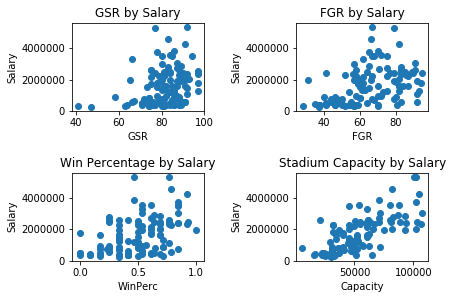

In [19]:
# create scatter plots 
fig = plt.figure()
set_I = fig.add_subplot(2, 2, 1)
set_I.scatter(coaches['GSR'],coaches['Salary'],) #normally want dependent to be 2nd (y axis)
set_I.set_title('GSR by Salary')
set_I.set_xlabel('GSR')
set_I.set_ylabel('Salary')

set_II = fig.add_subplot(2, 2, 2)
set_II.scatter(coaches['FGR'],coaches['Salary'],)
set_II.set_title('FGR by Salary')
set_II.set_xlabel('FGR')
set_II.set_ylabel('Salary')

set_III = fig.add_subplot(2, 2, 3)
set_III.scatter(coaches['WinPerc'],coaches['Salary'])
set_III.set_title('Win Percentage by Salary')
set_III.set_xlabel('WinPerc')
set_III.set_ylabel('Salary')

set_IV = fig.add_subplot(2, 2, 4)
set_IV.scatter(coaches['Capacity'],coaches['Salary'])
set_IV.set_title('Stadium Capacity by Salary')
set_IV.set_xlabel('Capacity')
set_IV.set_ylabel('Salary')

plt.subplots_adjust(left=0.1, right=0.925, top=0.925, bottom=0.1, 
    wspace = 0.7, hspace = 0.7)
plt.show()
#neither really linear
#make 2 models, 1 with GSR only and 1 with FGR only

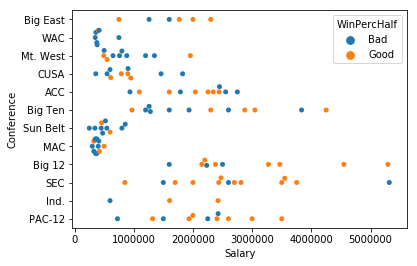

In [20]:
sns.swarmplot(x="Salary", y="Conference", hue="WinPercHalf", 
              data=coaches)
plt.show()

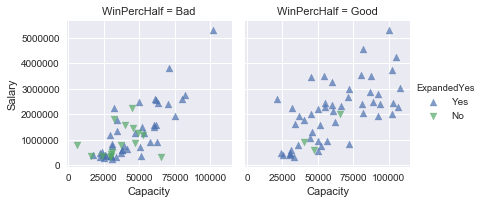

In [20]:
# trellis/lattice plot Capacity by Salary, conditioning on win percentage > 0.5 or not 
# and stadium expanded as  NO/YES shown in distinct colors

sns.set(style="darkgrid")

g = sns.FacetGrid(coaches,col="WinPercHalf", hue="ExpandedYes", 
                  hue_order=["Yes", "No"],
                  hue_kws=dict(marker=["^", "v"]))
g.map(plt.scatter, "Capacity", "Salary", alpha=.7)
g.add_legend();
plt.show()

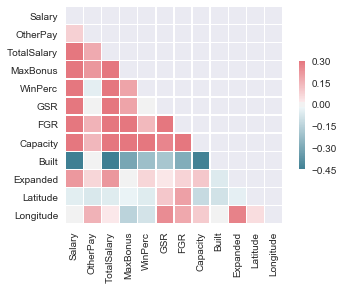

In [22]:
corr = coaches.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()
#built:min 1913,newer stadium means lower salary
#check which stadiums are newer, look at school and salary of stadium
#hypothesis-Big Ten has old(1920/40) stadiums,outlier(harvard/yale)-new stadium but low salary
#look at mean salary for stadiums built before and after 2000
#look at stadiums built in 2000s their location and salary
#quarter built between 1975 and 1914, hypothesis - most big 10 schools built between 1925 and 1975
#big 10 and sec conferences probably pay most money

C:\Users\johnc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


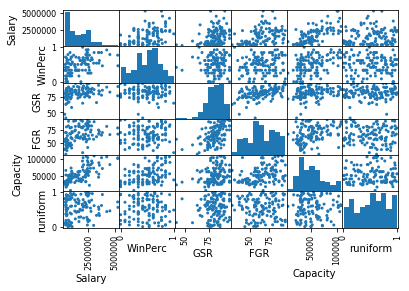

In [43]:
coaches2 = coaches.drop(['Name', 'School','TotalSalary','MaxBonus', 'OtherPay', 'Stadium', 'City', 'State', 'Div', 'Latitude', 'Longitude', 'Built', 'Expanded'], axis=1)
axes = pd.tools.plotting.scatter_matrix(coaches2,alpha=1)
#plt.tight_layout()
plt.show()


In [23]:
# employ training-and-test regimen for model validation
np.random.seed(1234)
coaches['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(coaches))
coaches_train = coaches[coaches['runiform'] >= 0.33]
coaches_test = coaches[coaches['runiform'] < 0.33]
# check training data frame
print('\ncoaches_train data frame (rows, columns): ',coaches_train.shape)
print(coaches_train.head())
# check test data frame
print('\ncoaches_test data frame (rows, columns): ',coaches_test.shape)
print(coaches_test.head())


coaches_train data frame (rows, columns):  (90, 22)
            Name            School Conference    Salary  OtherPay  \
1      Robb Akey             Idaho        WAC  375797.0    6200.0   
2  Gary Andersen        Utah State        WAC  415000.0       0.0   
3     Chris Ault       Nevada-Reno   Mt. West  493093.0       0.0   
4  David Bailiff              Rice       CUSA  608846.0       NaN   
7     Todd Berry  Louisiana-Monroe   Sun Belt  250000.0       NaN   

   TotalSalary  MaxBonus  WinPerc WinPercHalf  GSR    ...        City State  \
1     381997.0  158262.0    0.333         Bad   71    ...      Moscow    ID   
2     415000.0  150000.0    0.083         Bad   86    ...       Logan    UT   
3     493093.0   30000.0    0.615        Good   71    ...        Reno    NV   
4     608846.0       NaN    0.538        Good   90    ...     Houston    TX   
7     250000.0   62500.0    0.333         Bad   47    ...      Monroe    LA   

  Capacity   Built  Expanded  ExpandedYes  Div   Latitude

In [24]:
# specify a simple model with bobblehead entered last
my_model = str('Salary ~ Capacity + GSR + WinPerc')

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = coaches_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     44.40
Date:                Fri, 11 May 2018   Prob (F-statistic):           6.39e-17
Time:                        20:29:48   Log-Likelihood:                -1238.3
No. Observations:                  83   AIC:                             2485.
Df Residuals:                      79   BIC:                             2494.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.025e+06   8.65e+05     -2.340      0.0

In [41]:
# specify a simple model with bobblehead entered last
my_model = str('Salary ~ Capacity + FGR + WinPerc')

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = coaches_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())

#MODEL 1 above
#MODEL 2 switch out GSR with FGR, FGR is better

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     45.38
Date:                Sat, 12 May 2018   Prob (F-statistic):           3.73e-17
Time:                        00:33:03   Log-Likelihood:                -1237.7
No. Observations:                  83   AIC:                             2483.
Df Residuals:                      79   BIC:                             2493.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.111e+06   3.59e+05     -3.097      0.0

In [38]:
# specify a simple model with bobblehead entered last
my_model = str('Salary ~ Capacity + Conference')

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = coaches_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())

# training set predictions from the model fit to the training set
coaches_train['predict_Salary'] = train_model_fit.fittedvalues

# test set predictions from the model fit to the training set
coaches_test['predict_Salary'] = train_model_fit.predict(coaches_test)

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     14.32
Date:                Sat, 12 May 2018   Prob (F-statistic):           1.17e-14
Time:                        00:31:17   Log-Likelihood:                -1258.5
No. Observations:                  85   AIC:                             2543.
Df Residuals:                      72   BIC:                             2575.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               6.83

C:\Users\johnc\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\johnc\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [42]:
# specify a simple model with bobblehead entered last
my_model = str('Salary ~ Capacity + GSR + WinPerc + Conference')

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = coaches_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())

# training set predictions from the model fit to the training set
coaches_train['predict_Salary'] = train_model_fit.fittedvalues

# test set predictions from the model fit to the training set
coaches_test['predict_Salary'] = train_model_fit.predict(coaches_test)

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     12.89
Date:                Sat, 12 May 2018   Prob (F-statistic):           4.42e-14
Time:                        00:43:38   Log-Likelihood:                -1225.5
No. Observations:                  83   AIC:                             2481.
Df Residuals:                      68   BIC:                             2517.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1.37

C:\Users\johnc\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\johnc\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [43]:
# compute the proportion of response variance
# accounted for when predicting out-of-sample
print('\nProportion of Test Set Variance Accounted for: ',\
    round(np.power(coaches_test['Salary'].corr(coaches_test['predict_Salary']),2),3))

# use the full data set to obtain an estimate of the increase in
# attendance due to bobbleheads, controlling for other factors 
my_model_fit = smf.ols(my_model, data = coaches_test).fit()
print(my_model_fit.summary())


Proportion of Test Set Variance Accounted for:  0.593
                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     3.226
Date:                Sat, 12 May 2018   Prob (F-statistic):             0.0157
Time:                        00:43:42   Log-Likelihood:                -435.69
No. Observations:                  30   AIC:                             901.4
Df Residuals:                      15   BIC:                             922.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

In [ ]:
#create new data set for hypothetical coach,
#stadium size win%,GSR,confererence
#new data has to have variables used in OLS model
#1)create new csv
#new data set should have: syracuse in big east, big 10, acc (syracuse was in big east moved to acc)
#3 rows and 4 variables (in same order as,definitely conference),only thing that changes is the conference
#see what the predicted value for coach w
#recommended salary:predicted salary for syr coach in ACC

In [ ]:
#create new data set to do the prediction
#http://www.statsmodels.org/dev/examples/notebooks/generated/predict.html

In [31]:
# read in Coaches salary data and create data frame
coachesSyr = pd.read_csv("CoachesSyr.csv")

# examine the structure of the data frame
print("\nContents of coaches data frame ---------------")

print(coachesSyr.shape)  # check the structure of the data frame

# test set predictions from the model fit to the training set
coachesSyr['predict_Salary'] = train_model_fit.predict(coachesSyr)

# print the first five rows of the data frame
print(pd.DataFrame.head(coachesSyr))
#coachesDF = pd.DataFrame(coaches)


Contents of coaches data frame ---------------
(3, 8)
           Name    School  Capacity  GSR  WinPerc Conference     Salary  FGR  \
0  Doug Marrone  Syracuse   49250.0   86    0.333   Big East  1259276.0   82   
1  Doug Marrone  Syracuse   49250.0   86    0.333    Big Ten  1259276.0   82   
2  Doug Marrone  Syracuse   49250.0   86    0.333        ACC  1259276.0   82   

   predict_Salary  
0    1.536083e+06  
1    1.525396e+06  
2    1.702172e+06  
